[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Gokoy\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Gokoy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Original Text:
  Canada’s pharmaceutical manufacturing employment has steadily increased over the last five years to approximately 35,367 workers in 
2024, reflecting a growth of roughly 15.1% since 2018 and contributing to the country’s position as the 6th largest pharmaceutical market 
globally with a 2.1% share of the world market.

Between 2018 and 2024, Canadian pharmaceutical exports rose by about 38% while imports increased by roughly 35%, with the United States accounting 
for approximately 76.8% of Canada’s pharmaceutical exports in 2024, illustrating significant trade flows in the life sciences sector.

Manufacturing revenues across Canada reached an estimated $874.0 billion in 2023, up from $863.0 billion in 2022 — an increase of 1.3% — while net
revenues climbed to around $98.4 billion, highlighting ongoing growth in the domestic industrial sector.

In 2024 the manufacturing (NAICS 31-33) sector contributed about $52 billion to the GDP of Western Canada and employed roughly

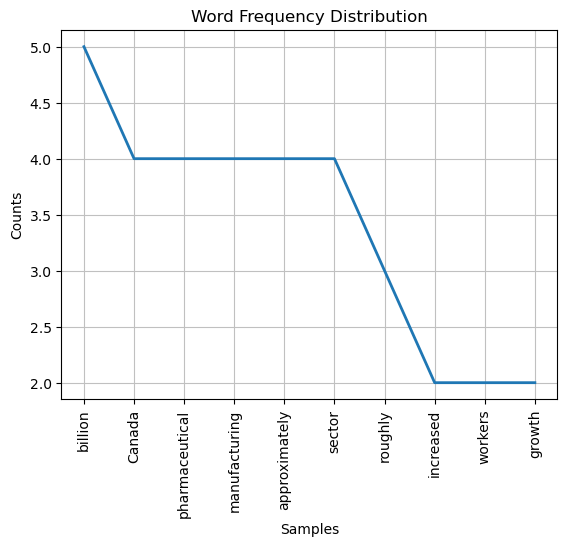


--- 7. Synonyms and Antonyms ---
Word: pushing
Synonyms: {'push', 'agitate', 'bear_on', 'campaign', 'advertize', 'pushing', 'tug', 'crowd', 'crusade', 'advertise', 'labour', 'fight', 'press', 'drive', 'force', 'labor', 'promote'}
Antonyms: {'pull'}


In [1]:
# Lab 3 - Natural Language Processing with NLTK
# BAM-3034: Sentiment Analysis & Text Mining

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, FreqDist
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Download necessary NLTK resources (uncomment if running for the first time)
# nltk.download("all")

# ---------------------------------------------
# Input Text
# ---------------------------------------------
text = """ Canada’s pharmaceutical manufacturing employment has steadily increased over the last five years to approximately 35,367 workers in 
2024, reflecting a growth of roughly 15.1% since 2018 and contributing to the country’s position as the 6th largest pharmaceutical market 
globally with a 2.1% share of the world market.

Between 2018 and 2024, Canadian pharmaceutical exports rose by about 38% while imports increased by roughly 35%, with the United States accounting 
for approximately 76.8% of Canada’s pharmaceutical exports in 2024, illustrating significant trade flows in the life sciences sector.

Manufacturing revenues across Canada reached an estimated $874.0 billion in 2023, up from $863.0 billion in 2022 — an increase of 1.3% — while net
revenues climbed to around $98.4 billion, highlighting ongoing growth in the domestic industrial sector.

In 2024 the manufacturing (NAICS 31-33) sector contributed about $52 billion to the GDP of Western Canada and employed roughly 436,000 workers across
Alberta, British Columbia, Manitoba, and Saskatchewan, accounting for approximately 28.6% of the regional manufacturing workforce.

The Canadian medical devices manufacturing sector generated an output of about $24.4 billion in 2023, with Ontario alone providing nearly 61.1% of the
value added and the industry supporting approximately 88,394 full-time equivalent jobs nationwide."""

print("Original Text:\n", text)

# ----------------------------------------
# 1. Tokenization
# ----------------------------------------
print("\n--- 1. Tokenization ---")
sentences = sent_tokenize(text)
terms = word_tokenize(text)

print("Sentence Tokenization:", sentences)
print("Word Tokenization:", terms)

# -------------------------------
# 2. Stop Words Removal
# -------------------------------
print("\n--- 2. Stop Words Removal ---")
stop_words = set(stopwords.words("english"))
filtered_words = [x for x in terms if x.lower() not in stop_words and x.isalpha()]

print("Filtered Words:", filtered_words)

# -------------------------------
# 3. Text Normalization
# -------------------------------
print("\n--- 3. Text Normalization ---")

# 3.1 Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]
print("Stemming:", stemmed_words)

# 3.2 Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w.lower()) for w in stemmed_words]
print("Lemmatization:", lemmatized_words)

# -------------------------------
# 4. POS Tagging
# -------------------------------
print("\n--- 4. Parts of Speech (POS) Tagging ---")
pos_tags = pos_tag(filtered_words)
print("POS Tags:", pos_tags)

# --------------------------------------------------
# 5. Named Entity Recognition (NER)
# --------------------------------------------------

print("\n--- 5. Named Entity Recognition ---")
ner_tree = ne_chunk(pos_tags)
print("Named Entities:")
print(ner_tree)

# ---------------------------------------------
# 6. Frequency Distribution
# ---------------------------------------------
print("\n--- 6. Frequency Distribution ---")
freq_dist = FreqDist(filtered_words)
print("Top 5 Most Common Words:", freq_dist.most_common(5))
freq_dist.plot(10, title="Word Frequency Distribution")

# -------------------------------
# 7. Synonyms and Antonyms
# -------------------------------
print("\n--- 7. Synonyms and Antonyms ---")
word_choice = "pushing"  # You can change this word
synonyms = []
antonyms = []

for syn in wordnet.synsets(word_choice):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print(f"Word: {word_choice}")
print("Synonyms:", set(synonyms))
print("Antonyms:", set(antonyms))
